In [121]:
%pylab inline
import pandas as pd
figsize(15,5)

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_excel('Iliad_battles.xlsx', 0)

In [21]:
com1 = df.Combatant1
com2 = df.Combatant2
coms = pd.concat([com1,com2])
combatants = pd.Series(coms.unique())
combatants

0                       Menelaos, son of Atreus
1                     Antilochos, son of Nestor
2              Elephanor, leader of the Abantes
3                   Aias (Ajax), son of Telamon
4                        Antiphos, son of Priam
5                      Odysseus, son of Laertes
6                    Diores, son of Amaryngkeus
7                            Thoas the Aitolian
8                       Diomedes, son of Tydeus
9                      Agamemnon, son of Atreus
10                 Idomeneus, son of Deukalion 
11                      Menelaos, son of Atreus
12             Meriones, companion of Idomeneus
13                        Meges, son of Phyleus
14                    Eurypylos, son of Euaimon
15                     Aineias, son of Anchises
16                    Antilochos, son of Nestor
17                         Hektor, son of Priam
18                  Tlepolemos, son of Herakles
19     Hektor, son of Priam & Ares, son of Zeus
20                            Ares, son 

In [22]:
df[:3]

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam",G,T,DRAW,NaN,3.380,Aphrodite intervenes and carries Paris off int...
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....


In [23]:
df.shape

(263, 8)

In [24]:
df.columns

Index([u'Combatant1', u'Combatant2', u'C1_Faction', u'C2_Faction', u'Winner',
       u'Loser_Killed', u'Iliad_loc', u'Notes'],
      dtype='object')

In [136]:
kills = df[df.Loser_Killed == 'yes']
nokill = df[df.Loser_Killed != 'yes']
nokill.shape

(27, 8)

In [112]:
s = 'Achilleus, son of Peleus'
s.split(',')[0]

'Achilleus, son of Peleus'

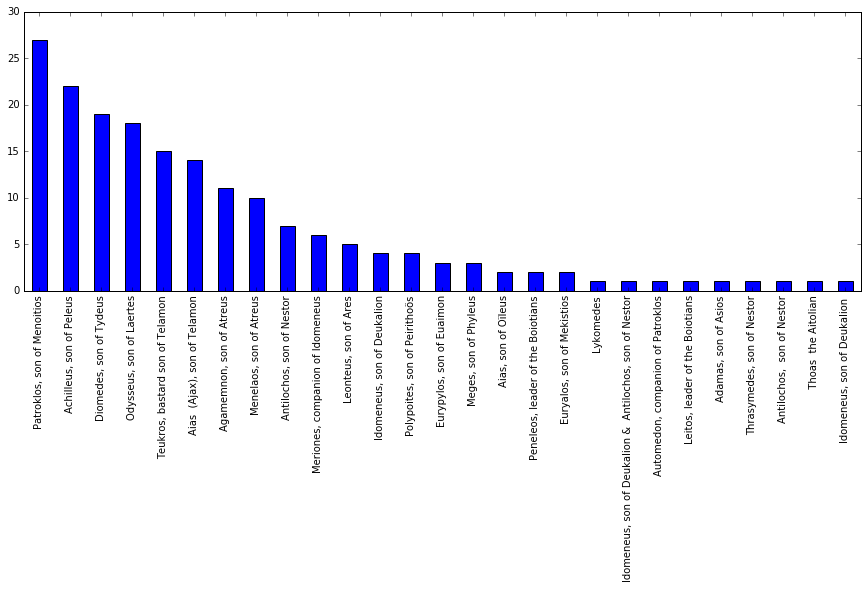

In [132]:
gkills = kills[kills.Winner.str.contains('G')]
g1 = gkills['Combatant1'][gkills.C1_Faction.str.contains('G')]
g2 = gkills['Combatant2'][gkills.C2_Faction.str.contains('G')]
gkill_list = pd.concat([g1,g2])
gkill_list.value_counts().plot(kind='bar')

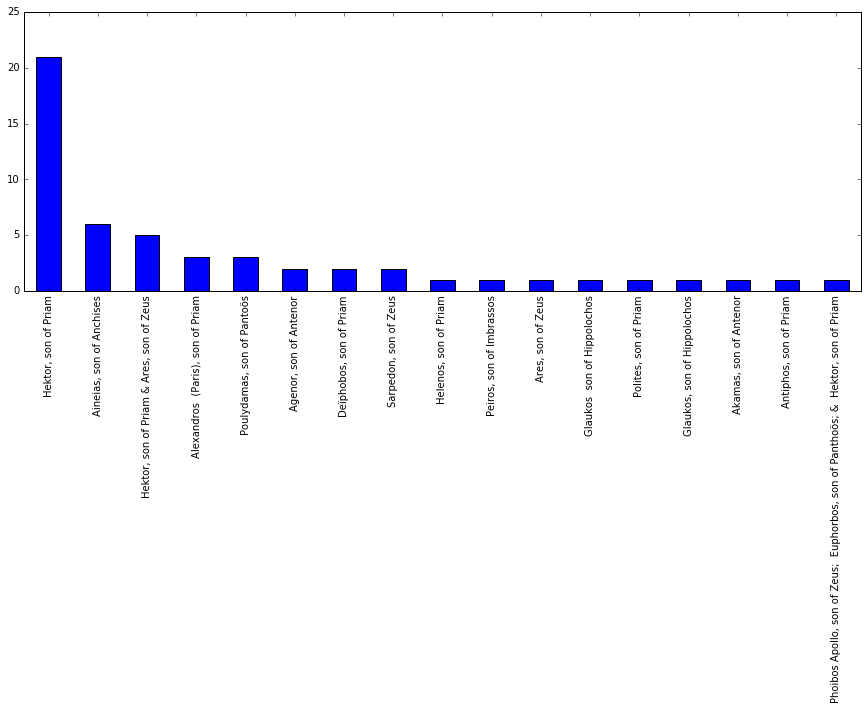

In [124]:
tkills = kills[kills.Winner.str.contains('T')]
t1 = tkills['Combatant1'][tkills.C1_Faction.str.contains('T')]
t2 = tkills['Combatant2'][tkills.C2_Faction.str.contains('T')]
tkill_list = pd.concat([t1,t2])
tkill_list.value_counts().plot(kind='bar')

In [125]:
gkills

,Combatant1,Combatant2,C1_Faction,C2_Faction,Winner,Loser_Killed,Iliad_loc,Notes
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias",G,T,G,yes,4.457,Echepolos killed by spear to the forehead (4.4...
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor",G,T,T,yes,4.465,Elephanor killed by sword between the ribs (4....
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion",G,T,G,yes,4.479,Simoeisios killed by spear to the right chest ...
4,"Antiphos, son of Priam","Leukos, companion of Odysseus",T,G,T,yes,4.489,Leukos killed by spear (aimed at Aias) to the...
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam",G,T,G,yes,4.499,Demokoön killed by spear to the temple (4.499-...
6,"Diores, son of Amaryngkeus","Peiros, son of Imbrassos",G,T,T,yes,4.521,"Diores wounded by stone to the shin, then kill..."
7,Thoas the Aitolian,"Peiros, son of Imbrassos",G,T,G,yes,4.527,"Peiros wounded by spear to the lung, then kill..."
8,"Diomedes, son of Tydeus","Phegeus, son of Dares",G,T,G,yes,5.009,Phegeus killed by spear to the chest (5.9-20)
10,"Agamemnon, son of Atreus","Odios, lord of the Halizones",G,T,G,yes,5.038,Odios thrown from his chariot and killed by sp...
11,"Idomeneus, son of Deukalion","Phaistos, son of Boros",G,T,G,yes,5.043,Phaistos killed by spear to the right shoulder...


In [68]:
df[['Combatant1', 'Combatant2']]

,Combatant1,Combatant2
0,"Menelaos, son of Atreus","Alexandros (Paris), son of Priam"
1,"Antilochos, son of Nestor","Echepolos, son of Thalysias"
2,"Elephanor, leader of the Abantes","Agenor, son of Antenor"
3,"Aias (Ajax), son of Telamon","Simoeisios, son of Anthemion"
4,"Antiphos, son of Priam","Leukos, companion of Odysseus"
5,"Odysseus, son of Laertes","Demokoön, bastard son of Priam"
6,"Diores, son of Amaryngkeus","Peiros, son of Imbrassos"
7,Thoas the Aitolian,"Peiros, son of Imbrassos"
8,"Diomedes, son of Tydeus","Phegeus, son of Dares"
9,"Diomedes, son of Tydeus","Idaios, son of Dares"


In [73]:
kills.shape

(236, 8)